<a href="https://colab.research.google.com/github/fedhere/PyBOOT/blob/master/playwPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sbn

In [ ]:
cleanupdf = pd.read_csv("https://data.delaware.gov/api/views/jumg-zbb3/rows.csv?accessType=DOWNLOAD")
cleanupdf

,County,Location Lat-Long,Cleanup Type,Cleanup Date,Cleanup Site,Adults,Children,People,Pounds,Miles,Bags,Cigarette Butts,Food Wrappers,Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line,Rope,6-Pack Holders,Other Plastic/Foam Packaging,Other Plastic Bottles,Strapping Bands,Tobacco Packaging/Wrap,Appliances,Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums
0,Kent,"(39.102739, -75.402356)",Beach,09/20/2008,Kitts Hummock,NaN,NaN,45,1500.0,1.00,21,8.0,64.0,NaN,NaN,141.0,73.0,NaN,52.0,31.0,111.0,40.0,123.0,81.0,NaN,19.0,NaN,NaN,NaN,20,1.0,28.0,12.0,4.0,6.0,15.0,4.0,4.0,NaN,26.0,16.0,27.0,219,NaN,4.0,11.0,NaN,NaN,3.0,15.0,NaN,NaN,NaN,11.0,70.0,1.0,NaN,4.0,3.0
1,Kent,"(39.085748, -75.421875)",Beach,09/20/2008,Ted Harvey WLA/ Ted Harvey Wildlife Area,NaN,NaN,45,165.0,2.00,13,4.0,12.0,NaN,NaN,18.0,NaN,NaN,21.0,23.0,62.0,18.0,46.0,28.0,NaN,NaN,NaN,NaN,NaN,5,NaN,3.0,10.0,2.0,5.0,14.0,NaN,NaN,NaN,10.0,NaN,5.0,0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,33.0,2.0,NaN,NaN,NaN
2,New Castle,"(39.738765, -75.53939)",Beach,09/20/2008,E. 7th Street - Barbiarz Park,NaN,NaN,18,180.0,1.00,18,172.0,100.0,NaN,NaN,68.0,7.0,NaN,43.0,35.0,68.0,41.0,70.0,133.0,NaN,44.0,NaN,NaN,NaN,21,NaN,32.0,7.0,NaN,2.0,2.0,NaN,11.0,1.0,0.0,4.0,8.0,7,NaN,NaN,11.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,2.0,4.0,3.0,NaN
3,New Castle,"(39.664715, -75.557785)",Beach,09/20/2008,Battery Park,NaN,NaN,51,892.0,0.50,52,541.0,871.0,NaN,NaN,1446.0,112.0,NaN,598.0,303.0,759.0,206.0,111.0,290.0,NaN,52.0,NaN,NaN,NaN,13,2.0,8.0,33.0,18.0,23.0,30.0,25.0,25.0,0.0,20.0,163.0,43.0,104,NaN,10.0,122.0,3.0,NaN,26.0,48.0,NaN,NaN,NaN,37.0,12.0,2.0,0.0,19.0,0.0
4,New Castle,"(39.504724, -75.580976)",Beach,09/20/2008,Augustine Beach Boat Ramp,NaN,NaN,70,2200.0,1.00,0,75.0,7.0,NaN,NaN,110.0,2.0,NaN,80.0,25.0,200.0,40.0,20.0,60.0,NaN,20.0,NaN,NaN,NaN,3,2.0,4.0,2.0,7.0,11.0,2.0,1.0,5.0,1.0,1.0,9.0,7.0,10,NaN,NaN,3.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Kent,"(39.330540817256, -75.470104303979)","Land (beach, shoreline and inland)",09/22/2018,Woodland Beach Pier,6.0,4.0,10,95.0,0.75,6,135.0,16.0,1.0,0.0,36.0,17.0,4.0,12.0,3.0,31.0,16.0,20.0,2.0,2.0,3.0,2.0,2.0,2.0,0,1.0,10.0,4.0,1.0,0.0,3.0,1.0,8.0,0.0,1.0,10.0,4.0,0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,20.0,43.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
445,Kent,"(39.340537155394, -75.487814336855)","Land (beach, shoreline and inland)",09/22/2018,Woodland Beach-Taylor's Gut,12.0,3.0,15,95.0,1.00,6,130.0,46.0,15.0,3.0,7.0,1.0,3.0,10.0,0.0,70.0,34.0,90.0,12.0,9.0,12.0,16.0,2.0,0.0,0,0.0,0.0,1.0,1.0,14.0,1.0,1.0,12.0,0.0,1.0,1.0,2.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
446,Sussex,"(38.789097986218, -75.157007597219)","Land (beach, shoreline and inland)",09/22/2018,Lewes Boat Ramp,7.0,2.0,9,150.0,0.50,6,118.0,40.0,16.0,6.0,21.0,29.0,15.0,16.0,6.0,31.0,22.0,26.0,20.0,22.0,4.0,12.0,8.0,9.0,2,6.0,8.0,11.0,3.0,20.0,2.0,7.0,2.0,0.0,2.0,8.0,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,9.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN
447,Sussex,"(38.645629073549, -75.6005945823)","Land (beach, shoreline and inland)",09/22/2018,Williams Pond - Seaford,20.0,4.0,24,211.0,5.00,21,374.0,682.0,415.0,198.0,227.0,230.0,68.0,141.0,59.0,349.0,132

In [ ]:
cleanupdf["Cleanup Date"]

0      09/20/2008
1      09/20/2008
2      09/20/2008
3      09/20/2008
4      09/20/2008
          ...    
444    09/22/2018
445    09/22/2018
446    09/22/2018
447    09/22/2018
448    09/22/2018
Name: Cleanup Date, Length: 449, dtype: object

In [ ]:
cleanupdf = pd.read_csv("https://data.delaware.gov/api/views/jumg-zbb3/rows.csv?accessType=DOWNLOAD", 
            parse_dates=["Cleanup Date"])


In [ ]:
cleanupdf["Cleanup Date"]

0     2008-09-20
1     2008-09-20
2     2008-09-20
3     2008-09-20
4     2008-09-20
         ...    
444   2018-09-22
445   2018-09-22
446   2018-09-22
447   2018-09-22
448   2018-09-22
Name: Cleanup Date, Length: 449, dtype: datetime64[ns]

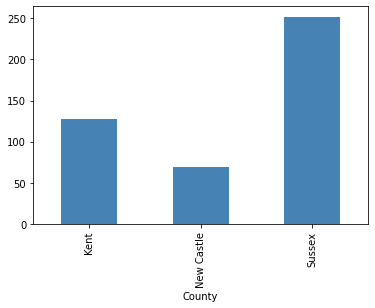

In [ ]:
cleanupdf.groupby(["County"]
).County.count().plot(kind='bar', color='Steelblue');

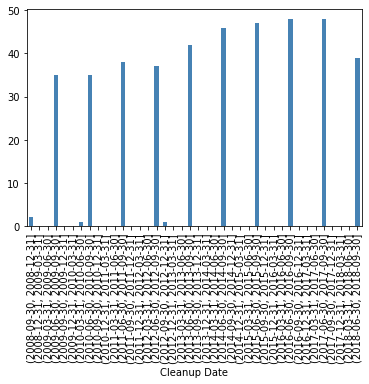

In [ ]:
cleanupdf.groupby(pd.cut(cleanupdf["Cleanup Date"], 
                   pd.date_range('2008-09-01', '2018-10-01', 
                                 freq='3M'))).County.count(
                                 ).plot(kind='bar', color='Steelblue')

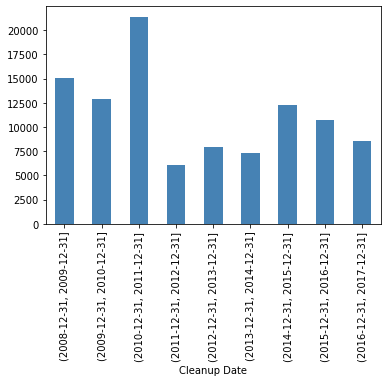

In [ ]:
cleanupdf.groupby(pd.cut(cleanupdf["Cleanup Date"], 
                   pd.date_range('2008-09-01', '2018-10-01', 
                                 freq='1Y'))).Pounds.sum(
                                 ).plot(kind='bar', color='Steelblue')

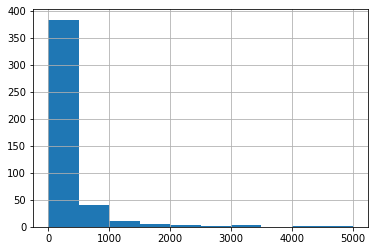

In [ ]:
cleanupdf.Pounds.hist()

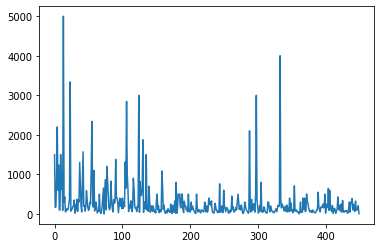

In [ ]:
cleanupdf.Pounds.plot()

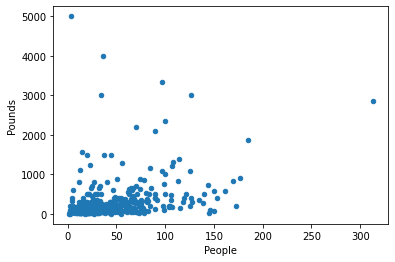

In [ ]:
cleanupdf.plot(x="People", y="Pounds", kind="scatter");

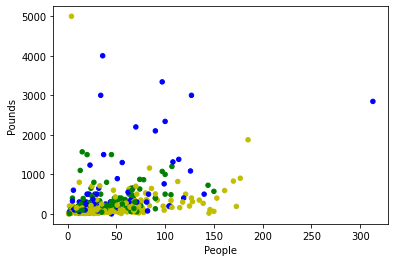

In [ ]:
cleanupdf.plot(x="People", y="Pounds", kind="scatter", 
               c=cleanupdf.County.map({"Kent":'g', "Sussex":'y',
                                       "New Castle":'b'}));

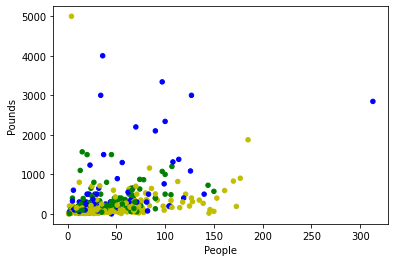

In [ ]:
cleanupdf.plot(x="People", y="Pounds", kind="scatter", 
               c=cleanupdf.County.map({"Kent":'g', "Sussex":'y',
                                       "New Castle":'b'}));

In [ ]:
cleanupdf.groupby("County").count()

,Location Lat-Long,Cleanup Type,Cleanup Date,Cleanup Site,Adults,Children,People,Pounds,Miles,Bags,Cigarette Butts,Food Wrappers,Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line,Rope,6-Pack Holders,Other Plastic/Foam Packaging,Other Plastic Bottles,Strapping Bands,Tobacco Packaging/Wrap,Appliances,Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums
County,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Kent,122,128,128,125,69,69,128,128,128,128,114,117,67,66,119,105,68,115,115,120,117,120,117,68,111,68,68,68,128,94,103,109,99,127,124,100,113,64,104,94,98,128,59,94,73,83,80,62,93,66,67,67,50,45,26,16,28,9
New Castle,69,69,69,69,42,42,69,69,69,69,62,66,39,39,64,59,41,64,64,66,67,66,66,39,62,41,38,39,69,46,60,58,60,67,66,52,63,40,57,61,62,69,35,61,47,57,45,52,58,38,37,38,25,20,14,11,20,7
Sussex,242,252,252,252,159,159,252,252,252,252,239,240,153,147,241,226,158,238,238,241,237,239,239,158,224,153,155,150,252,199,222,228,179,246,236,220,222,126,231,230,211,252,141,157,159,170,181,142,208,154,149,155,82,77,51,43,49,17


In [ ]:
cleanupdf.groupby("County").mean()

,Adults,Children,People,Pounds,Miles,Bags,Cigarette Butts,Food Wrappers,Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line,Rope,6-Pack Holders,Other Plastic/Foam Packaging,Other Plastic Bottles,Strapping Bands,Tobacco Packaging/Wrap,Appliances,Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums
County,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Kent,21.333333,12.536232,38.273438,291.863281,1.478047,16.257812,207.956140,67.880342,10.850746,4.863636,65.462185,14.933333,17.764706,18.947826,21.713043,86.691667,54.675214,81.983333,40.940171,34.823529,13.549550,8.970588,17.397059,9.411765,6.242188,4.882979,14.766990,11.238532,4.676768,15.456693,6.314516,4.720000,18.194690,0.593750,13.490385,14.457447,4.948980,24.203125,3.491525,3.159574,5.698630,2.277108,1.625000,0.645161,3.408602,20.863636,44.611940,99.492537,12.860000,22.866667,2.846154,1.875000,6.250000,1.111111
New Castle,27.238095,9.000000,47.826087,658.492754,1.343768,26.971014,187.919355,159.848485,20.333333,13.384615,255.718750,16.440678,44.731707,103.609375,49.984375,264.500000,76.223881,61.333333,51.287879,31.692308,12.225806,13.536585,26.710526,14.846154,5.608696,1.956522,9.383333,7.724138,5.783333,30.104478,13.227273,6.846154,15.301587,0.525000,3.263158,49.622951,18.048387,15.637681,1.542857,5.475410,32.872340,16.140351,2.400000,5.115385,23.775862,91.026316,166.810811,204.184211,29.160000,21.850000,3.357143,4.272727,8.250000,1.857143
Sussex,26.333333,9.628931,42.662698,185.356151,1.799974,13.234127,578.799163,142.316667,18.261438,8.823129,172.651452,17.035398,23.272152,68.550420,36.247899,54.170124,22.341772,39.979079,48.924686,34.170886,17.004464,14.385621,14.316129,7.060000,9.011905,7.462312,15.400901,15.557018,3.139665,26.869919,4.936441,10.890909,10.563063,0.460317,26.939394,26.978261,5.379147,19.555556,16.879433,1.254777,23.823899,1.747059,1.569061,0.774648,7.408654,52.428571,27.812081,183.541935,17.573171,33.883117,2.803922,1.488372,3.285714,0.529412


In [ ]:
cleanupdf.groupby("County").median()

,Adults,Children,People,Pounds,Miles,Bags,Cigarette Butts,Food Wrappers,Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line,Rope,6-Pack Holders,Other Plastic/Foam Packaging,Other Plastic Bottles,Strapping Bands,Tobacco Packaging/Wrap,Appliances,Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums
County,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Kent,20.0,10.0,29.0,200.0,1.0,13.0,55.5,53.0,8.0,3.0,43.0,7.0,13.0,13.0,8.0,70.0,31.0,59.0,29.0,25.5,10.0,6.0,13.0,7.0,4.0,3.0,9.0,8.0,2.0,9.0,4.0,3.0,7.0,0.0,8.5,3.5,3.0,8.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,15.0,30.0,85.0,8.0,13.0,1.0,1.0,3.0,1.0
New Castle,12.5,4.5,30.0,300.0,1.0,20.0,72.0,71.0,19.0,5.0,81.0,8.0,25.0,36.5,16.5,128.0,39.0,48.0,28.5,18.0,7.0,10.0,16.0,14.0,2.0,1.0,6.5,4.0,4.0,14.0,9.0,2.0,9.0,0.0,2.0,17.0,8.0,9.0,0.0,2.0,3.0,1.0,0.0,2.0,5.0,31.5,17.0,65.5,26.0,12.0,2.5,3.0,7.0,1.0
Sussex,18.0,4.0,30.0,100.0,1.0,9.5,294.0,82.0,6.0,3.0,103.0,10.0,16.0,36.0,14.5,32.0,10.0,20.0,22.0,25.0,9.0,9.0,10.0,5.0,3.0,4.0,6.0,9.0,1.0,12.0,2.0,7.0,6.0,0.0,13.0,16.0,3.0,11.0,6.0,0.0,3.0,1.0,1.0,0.0,3.0,21.5,6.0,128.0,13.0,17.0,2.0,1.0,2.0,0.0


In [ ]:
df_ = cleanupdf.groupby("County").mean()
df_.Pounds / df_.Bags

County
Kent          17.952186
New Castle    24.414831
Sussex        14.005922
dtype: float64

In [ ]:
cleanupdf.columns

Index(['County', 'Location Lat-Long', 'Cleanup Type', 'Cleanup Date',
       'Cleanup Site', 'Adults', 'Children', 'People', 'Pounds', 'Miles',
       'Bags', 'Cigarette Butts', 'Food Wrappers',
       'Take Out/Away Containers (Plastic)', 'Take Out/Away Containers (Foam)',
       'Bottle Caps (Plastic)', 'Bottle Caps (Metal)', 'Lids (Plastic)',
       'Straws, Stirrers', 'Forks, Knives, Spoons',
       'Beverage Bottles (Plastic)', 'Beverage Bottles (Glass)',
       'Beverage Cans', 'Grocery Bags (Plastic)', 'Other Plastic Bags',
       'Paper Bags', 'Cups, Plates (Paper)', 'Cups, Plates (Plastic)',
       'Cups, Plates (Foam)', 'Fishing Buoys, Pots & Traps',
       'Fishing Net & Pieces', 'Fishing Line', 'Rope', '6-Pack Holders',
       'Other Plastic/Foam Packaging', 'Other Plastic Bottles',
       'Strapping Bands', 'Tobacco Packaging/Wrap', 'Appliances', 'Balloons',
       'Cigar Tips', 'Cigarette Lighters', 'Construction Materials',
       'Fireworks', 'Tires', 'Toys', 'Condoms',

In [ ]:
cleanupdf.iloc[:,11:]

,Cigarette Butts,Food Wrappers,Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line,Rope,6-Pack Holders,Other Plastic/Foam Packaging,Other Plastic Bottles,Strapping Bands,Tobacco Packaging/Wrap,Appliances,Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums
0,8.0,64.0,NaN,NaN,141.0,73.0,NaN,52.0,31.0,111.0,40.0,123.0,81.0,NaN,19.0,NaN,NaN,NaN,20,1.0,28.0,12.0,4.0,6.0,15.0,4.0,4.0,NaN,26.0,16.0,27.0,219,NaN,4.0,11.0,NaN,NaN,3.0,15.0,NaN,NaN,NaN,11.0,70.0,1.0,NaN,4.0,3.0
1,4.0,12.0,NaN,NaN,18.0,NaN,NaN,21.0,23.0,62.0,18.0,46.0,28.0,NaN,NaN,NaN,NaN,NaN,5,NaN,3.0,10.0,2.0,5.0,14.0,NaN,NaN,NaN,10.0,NaN,5.0,0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,33.0,2.0,NaN,NaN,NaN
2,172.0,100.0,NaN,NaN,68.0,7.0,NaN,43.0,35.0,68.0,41.0,70.0,133.0,NaN,44.0,NaN,NaN,NaN,21,NaN,32.0,7.0,NaN,2.0,2.0,NaN,11.0,1.0,0.0,4.0,8.0,7,NaN,NaN,11.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,2.0,4.0,3.0,NaN
3,541.0,871.0,NaN,NaN,1446.0,112.0,NaN,598.0,303.0,759.0,206.0,111.0,290.0,NaN,52.0,NaN,NaN,NaN,13,2.0,8.0,33.0,18.0,23.0,30.0,25.0,25.0,0.0,20.0,163.0,43.0,104,NaN,10.0,122.0,3.0,NaN,26.0,48.0,NaN,NaN,NaN,37.0,12.0,2.0,0.0,19.0,0.0
4,75.0,7.0,NaN,NaN,110.0,2.0,NaN,80.0,25.0,200.0,40.0,20.0,60.0,NaN,20.0,NaN,NaN,NaN,3,2.0,4.0,2.0,7.0,11.0,2.0,1.0,5.0,1.0,1.0,9.0,7.0,10,NaN,NaN,3.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,135.0,16.0,1.0,0.0,36.0,17.0,4.0,12.0,3.0,31.0,16.0,20.0,2.0,2.0,3.0,2.0,2.0,2.0,0,1.0,10.0,4.0,1.0,0.0,3.0,1.0,8.0,0.0,1.0,10.0,4.0,0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,20.0,43.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
445,130.0,46.0,15.0,3.0,7.0,1.0,3.0,10.0,0.0,70.0,34.0,90.0,12.0,9.0,12.0,16.0,2.0,0.0,0,0.0,0.0,1.0,1.0,14.0,1.0,1.0,12.0,0.0,1.0,1.0,2.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
446,118.0,40.0,16.0,6.0,21.0,29.0,15.0,16.0,6.0,31.0,22.0,26.0,20.0,22.0,4.0,12.0,8.0,9.0,2,6.0,8.0,11.0,3.0,20.0,2.0,7.0,2.0,0.0,2.0,8.0,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,9.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN
447,374.0,682.0,415.0,198.0,227.0,230.0,68.0,141.0,59.0,349.0,132.0,148.0,97.0,22.0,34.0,63.0,66.0,20.0,3,42.0,29.0,0.0,0.0,36.0,3.0,18.0,14.0,0.0,8.0,37.0,9.0,9,0.0,0.0,0.0,4.0,0.0,0.0,0.0,79.0,52.0,174.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cleanupdf.iloc[:,11:].max()

Cigarette Butts                       5070.0
Food Wrappers                         1002.0
Take Out/Away Containers (Plastic)     415.0
Take Out/Away Containers (Foam)        198.0
Bottle Caps (Plastic)                 1446.0
Bottle Caps (Metal)                    230.0
Lids (Plastic)                         308.0
Straws, Stirrers                      1137.0
Forks, Knives, Spoons                  352.0
Beverage Bottles (Plastic)            2834.0
Beverage Bottles (Glass)               679.0
Beverage Cans                          597.0
Grocery Bags (Plastic)                 456.0
Other Plastic Bags                     366.0
Paper Bags                             170.0
Cups, Plates (Paper)                   116.0
Cups, Plates (Plastic)                 150.0
Cups, Plates (Foam)                     72.0
Fishing Buoys, Pots & Traps            204.0
Fishing Net & Pieces                    99.0
Fishing Line                           561.0
Rope                                   139.0
6-Pack Hol

In [ ]:
cleanupdf[
cleanupdf.iloc[:,11:]["Cigarette Butts"] == 
cleanupdf.iloc[:,11:]["Cigarette Butts"].max()]

,County,Location Lat-Long,Cleanup Type,Cleanup Date,Cleanup Site,Adults,Children,People,Pounds,Miles,Bags,Cigarette Butts,Food Wrappers,Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line,Rope,6-Pack Holders,Other Plastic/Foam Packaging,Other Plastic Bottles,Strapping Bands,Tobacco Packaging/Wrap,Appliances,Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums
202,Sussex,"(38.7168581635821, -75.0757598876953)",Beach,2013-09-21,Rehoboth Beach,47.0,4.0,51,110.0,2.0,12,5070.0,354.0,18.0,7.0,98.0,11.0,56.0,57.0,33.0,47.0,4.0,7.0,21.0,33.0,21.0,37.0,10.0,6.0,1,1.0,5.0,NaN,NaN,58.0,10.0,6.0,11.0,NaN,8.0,48.0,8.0,6,1.0,1.0,NaN,2.0,NaN,NaN,1.0,110.0,3.0,242.0,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

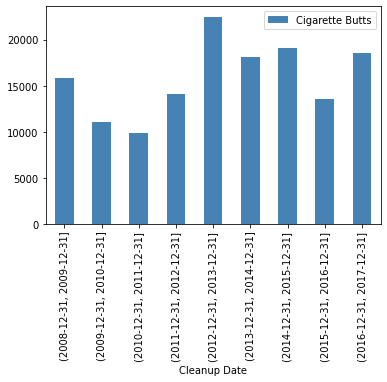

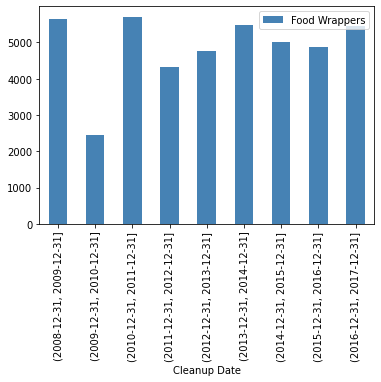

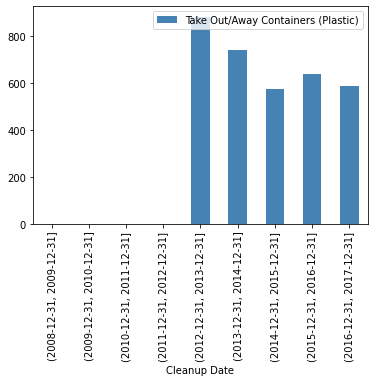

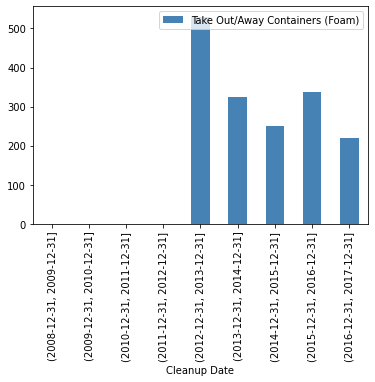

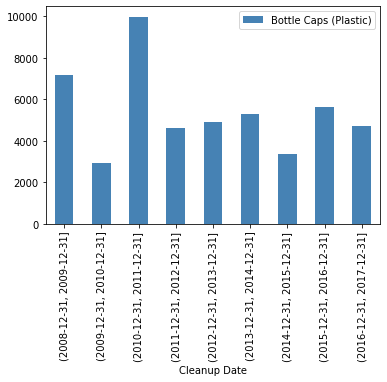

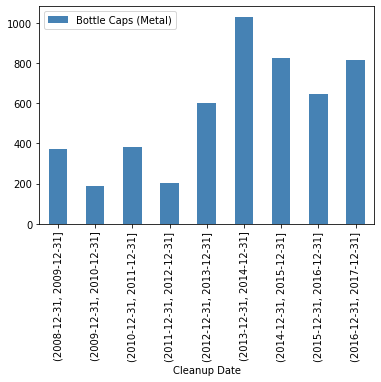

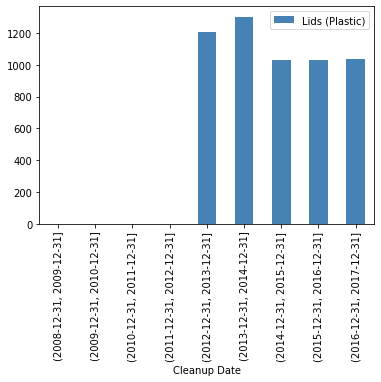

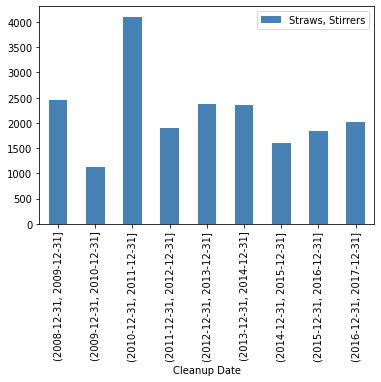

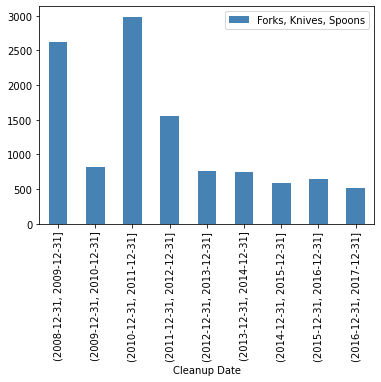

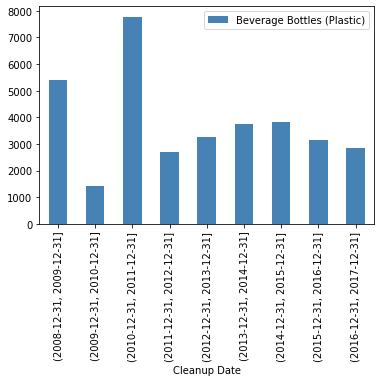

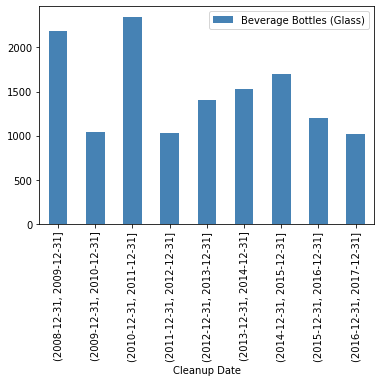

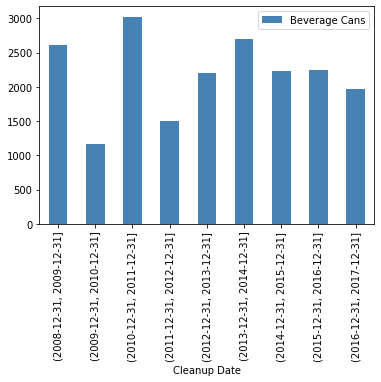

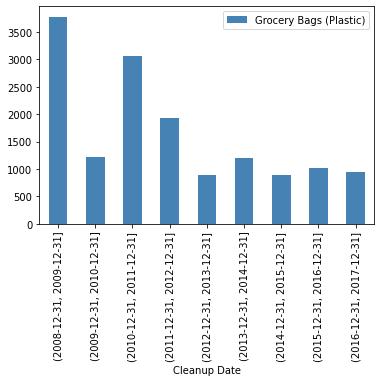

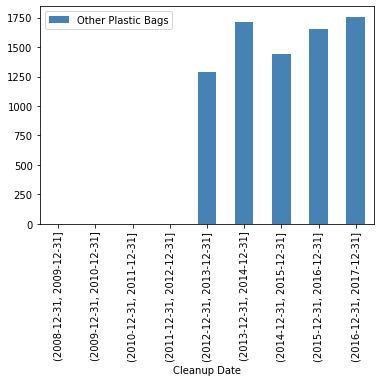

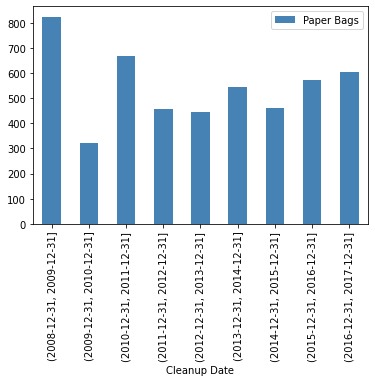

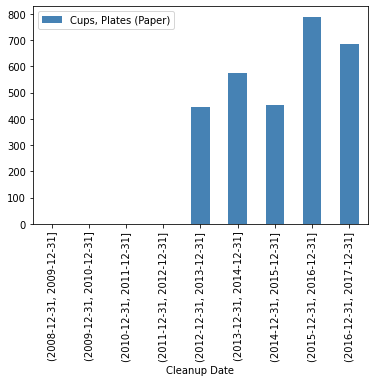

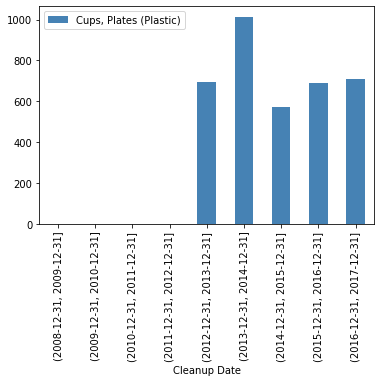

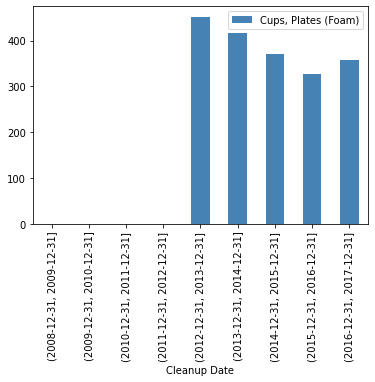

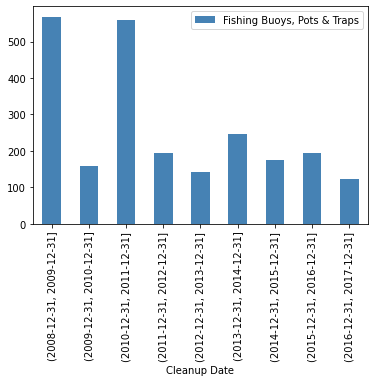

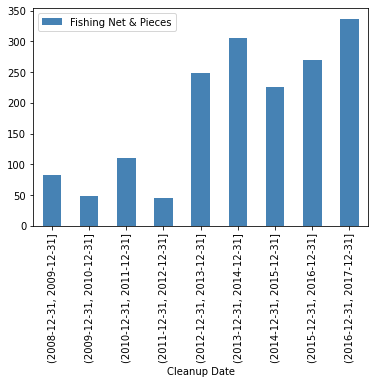

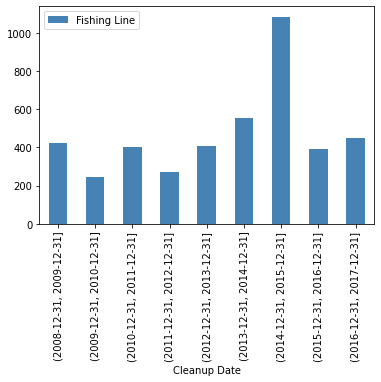

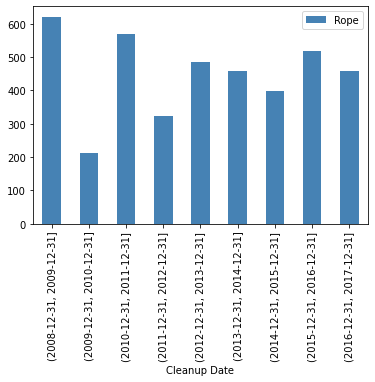

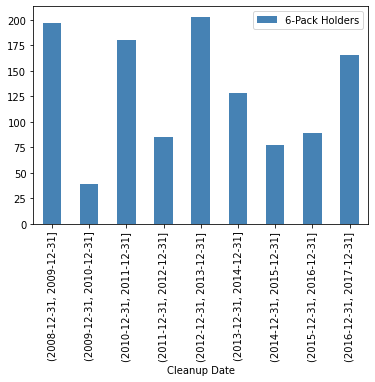

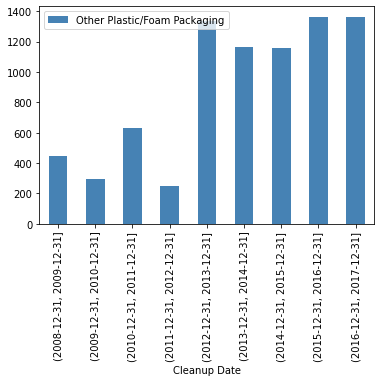

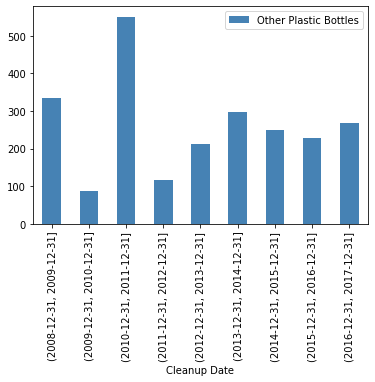

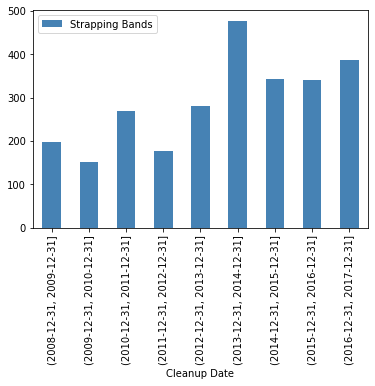

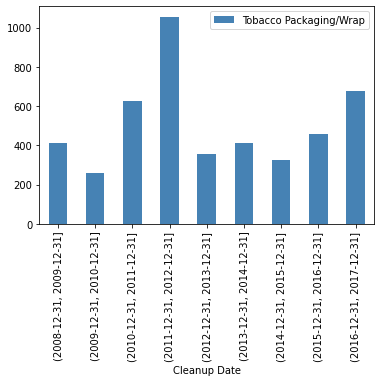

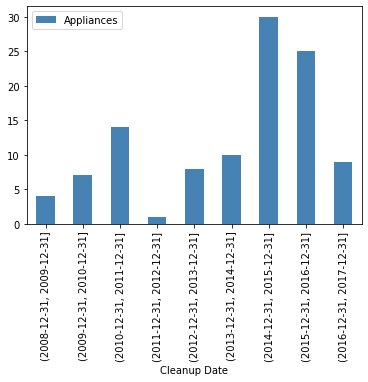

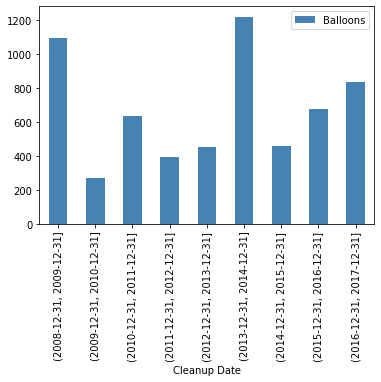

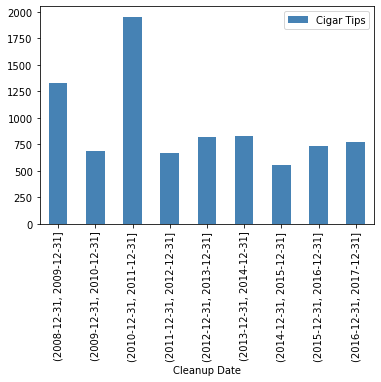

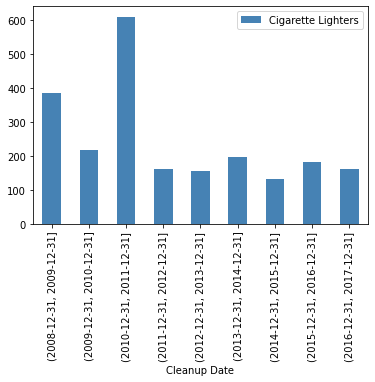

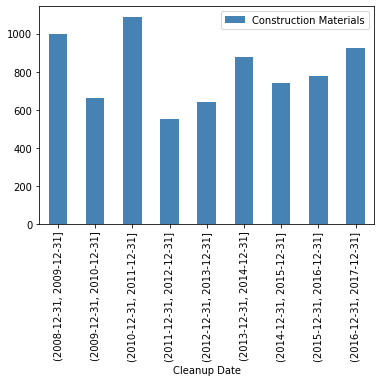

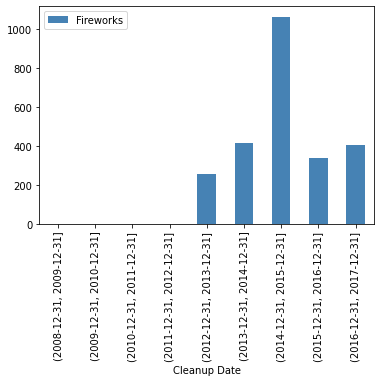

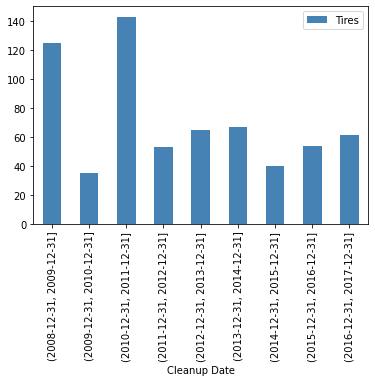

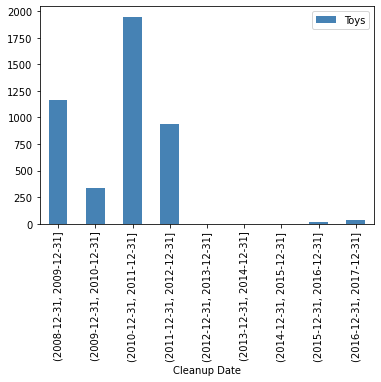

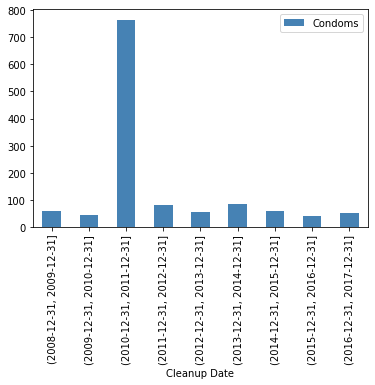

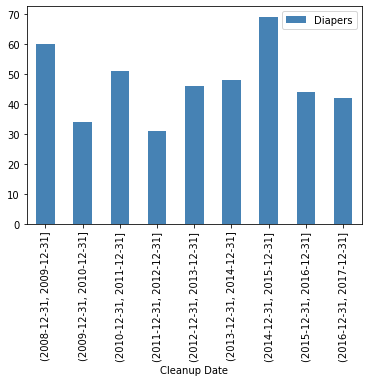

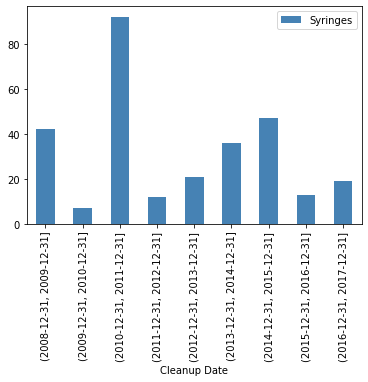

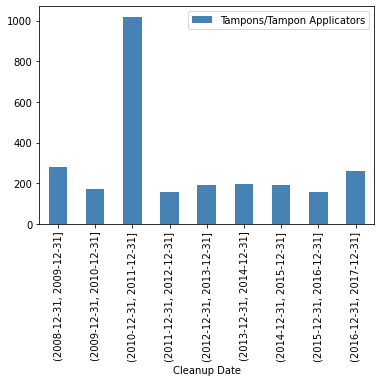

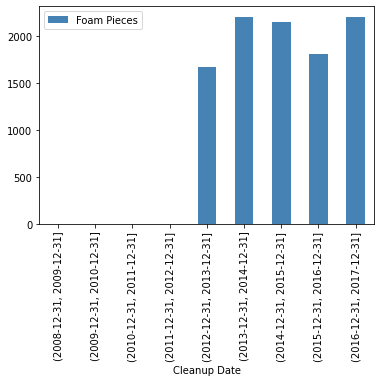

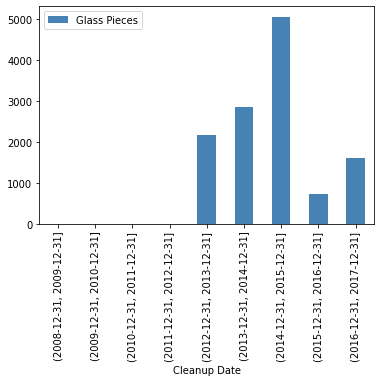

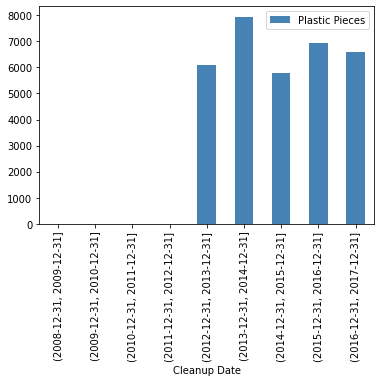

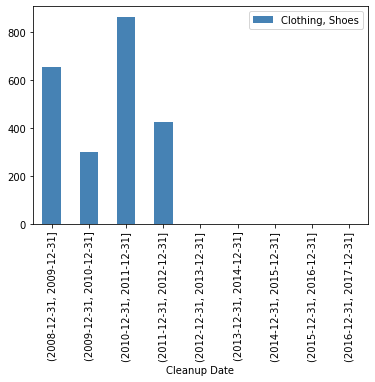

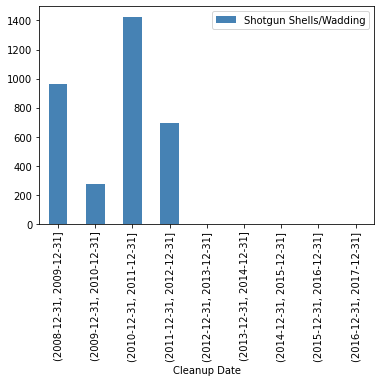

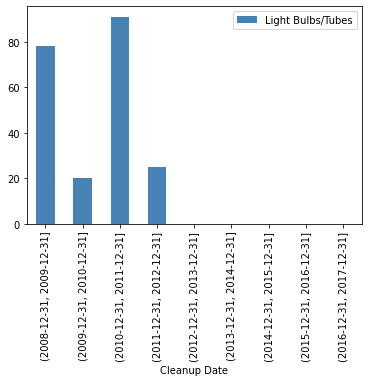

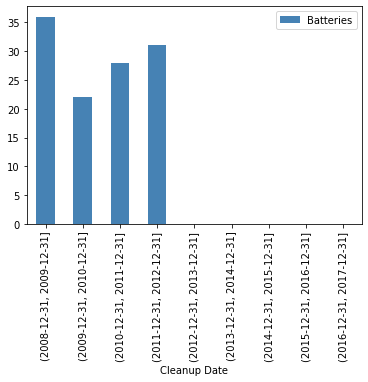

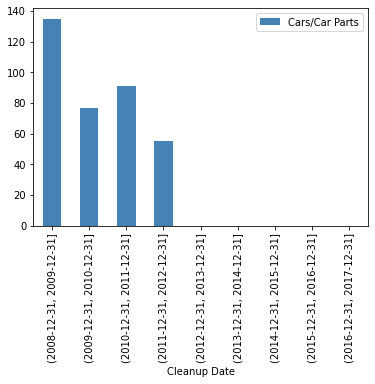

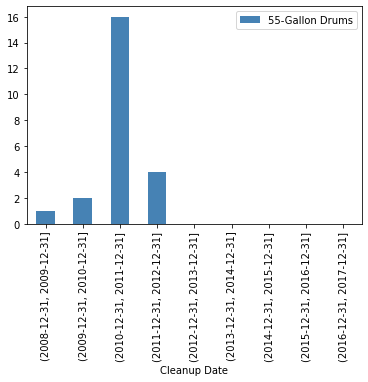

In [ ]:
df_ = pd.cut(cleanupdf["Cleanup Date"], 
                   pd.date_range('2008-09-01', '2018-10-01', 
                                 freq='1Y'))

for c in cleanupdf.columns[11:]:
  pl.figure()
  ax = cleanupdf.groupby(df_)[c].sum().plot(kind='bar', 
                                        color='Steelblue',
                                        label=c);
  pl.legend()

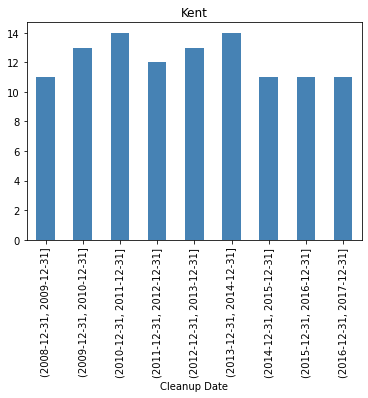

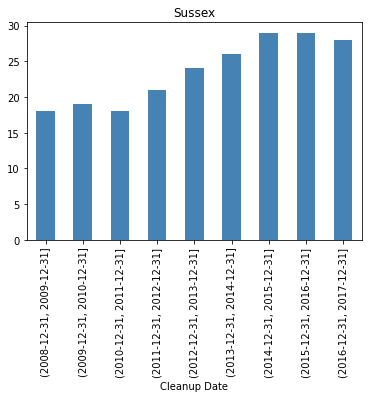

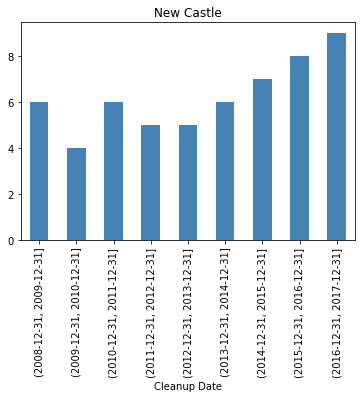

In [ ]:
dr = dr = pd.date_range('2008-09-01', '2018-10-01', 
                                 freq='1Y')
for c in ["Kent", "Sussex", "New Castle"]:
  pl.figure()
  cleanupdf[cleanupdf.County == c].groupby(pd.cut(
    cleanupdf[cleanupdf.County == c]["Cleanup Date"], 
                   dr)).County.count().plot(kind='bar', 
                                            color='Steelblue', 
                                            title=c)

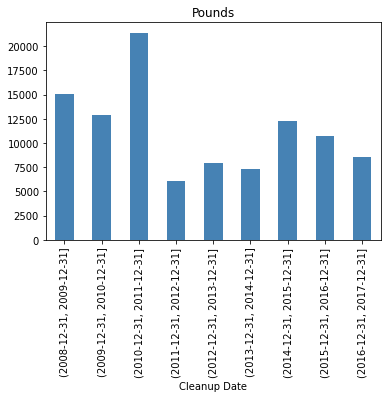

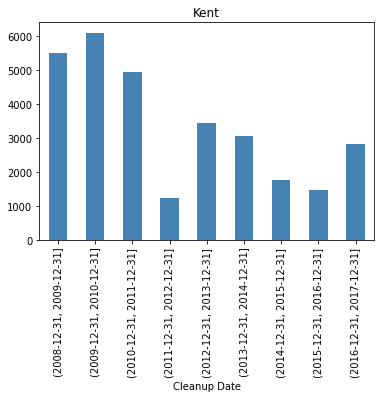

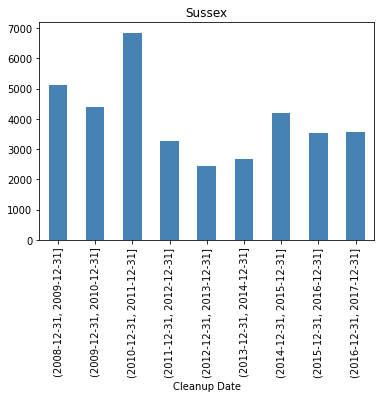

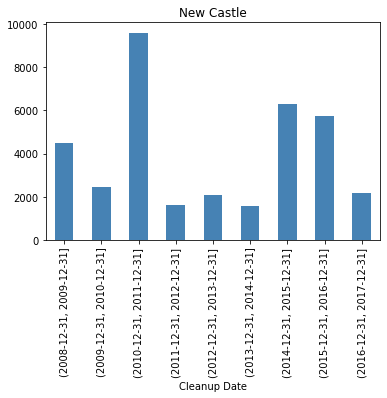

In [ ]:
pl.figure()
cleanupdf.groupby(pd.cut(
    cleanupdf["Cleanup Date"], 
                   dr)).Pounds.sum().plot(kind='bar', 
                                            color='Steelblue', 
                                            title="Pounds")
                   
for c in ["Kent", "Sussex", "New Castle"]:
  pl.figure()
  cleanupdf[cleanupdf.County == c].groupby(pd.cut(
    cleanupdf[cleanupdf.County == c]["Cleanup Date"], 
                   dr)).Pounds.sum().plot(kind='bar', 
                                            color='Steelblue', 
                                            title=c)

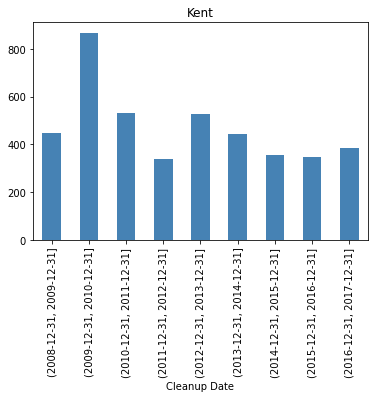

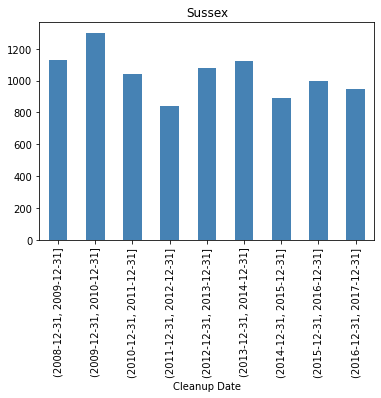

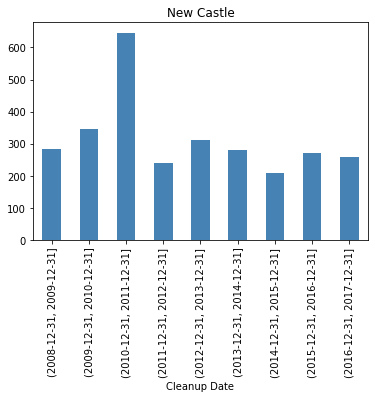

In [ ]:

for c in ["Kent", "Sussex", "New Castle"]:
  pl.figure()
  cleanupdf[cleanupdf.County == c].groupby(pd.cut(
    cleanupdf[cleanupdf.County == c]["Cleanup Date"], 
                   dr)).People.sum().plot(kind='bar', 
                                            color='Steelblue', 
                                            title=c)

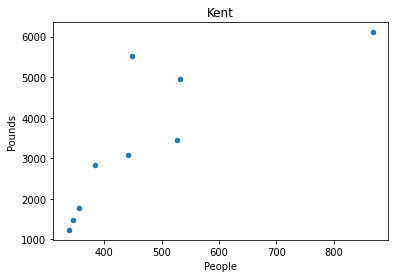

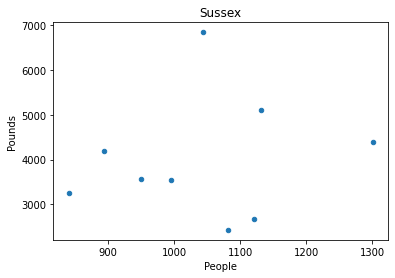

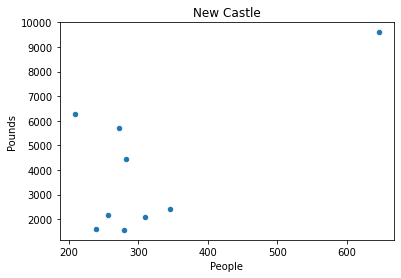

In [ ]:
for c in ["Kent", "Sussex", "New Castle"]:
  df_ = cleanupdf[cleanupdf.County == c].groupby(pd.cut(
    cleanupdf[cleanupdf.County == c]["Cleanup Date"], 
                   dr)).sum()
  df_.plot(x="People", y="Pounds", kind="scatter", title=c)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols(formula="Pounds ~ People", data=cleanupdf)
model

In [ ]:
model = model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pounds   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     62.09
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           2.53e-14
Time:                        12:04:53   Log-Likelihood:                -3399.0
No. Observations:                 449   AIC:                             6802.
Df Residuals:                     447   BIC:                             6810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.8711     33.486      2.714      0.007      25.062     156.681
People         4.6809      0.594      7.879      0.000       3.513       5.848
==============================================================================
Omnibus:                      522.725   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33994.124
Skew:                           5.457   Prob(JB):                         0.00
Kurtosis:                      44.206   Cond. No.                         85.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 432x288 with 0 Axes>

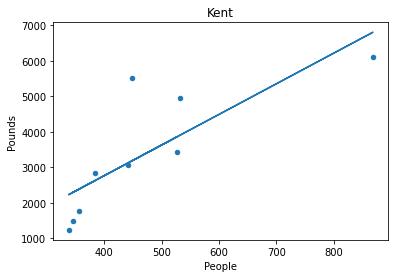

<Figure size 432x288 with 0 Axes>

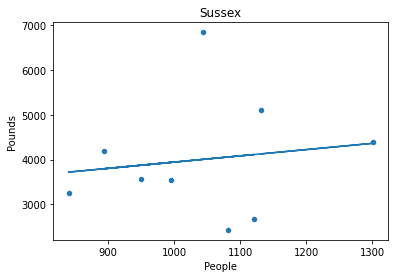

<Figure size 432x288 with 0 Axes>

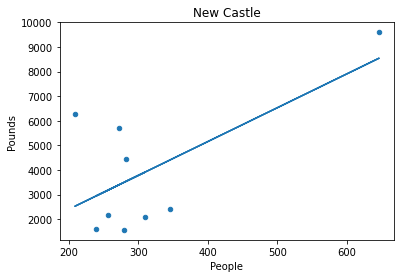

In [ ]:
for c in ["Kent", "Sussex", "New Castle"]:
  df_ = cleanupdf[cleanupdf.County == c].groupby(pd.cut(
    cleanupdf[cleanupdf.County == c]["Cleanup Date"], 
                   dr)).sum()
  pl.figure()
  model = smf.ols(formula="Pounds ~ People", data=df_).fit()
  df_.plot(x="People", y="Pounds", kind="scatter", title=c)
  pl.plot(df_.People, model.predict(df_.People))

In [ ]:
modelNC = smf.ols(formula="Pounds ~ I(People**2) + People", data=cleanupdf[cleanupdf.County == "New Castle"]).fit()
modelNC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pounds   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     11.99
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           3.62e-05
Time:                        12:10:08   Log-Likelihood:                -555.81
No. Observations:                  69   AIC:                             1118.
Df Residuals:                      66   BIC:                             1124.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        132.6102    167.960      0.790      0.433    -202.732     467.952
I(People ** 2)    -0.0121      0.017     -0.721      0.473      -0.046       0.021
People            12.1597      4.252      2.860      0.006       3.670      20.649
==============================================================================
Omnibus:                       49.275   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.623
Skew:                           2.234   Prob(JB):                     5.40e-38
Kurtosis:                       9.304   Cond. No.                     2.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""